<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/Immigration_to_Canada_Dataset_Area_Plots_Histograms_and_Bar_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Area-Plots-Histograms-and-Bar-Charts

In [1]:
#Import Primary Modules:
import numpy as np
import pandas as pd

# use the inline backend to generate the plots within the browser
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.7.1


# Fetching Data
Dataset: Immigration to Canada from 1980 to 2013 - International migration flows to and from selected countries

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 39)


In [5]:
# Set the country name as index - useful for quickly looking up countries using .loc method.

df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
print('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [10]:
# Create a list of years from 1980 - 2013
years = list(map(str, range(1980, 2014)))

years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

Area Plots

In [12]:
# Visualize this plot as a cumulative plot, also knows as a Stacked Line Plot or Area plot

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


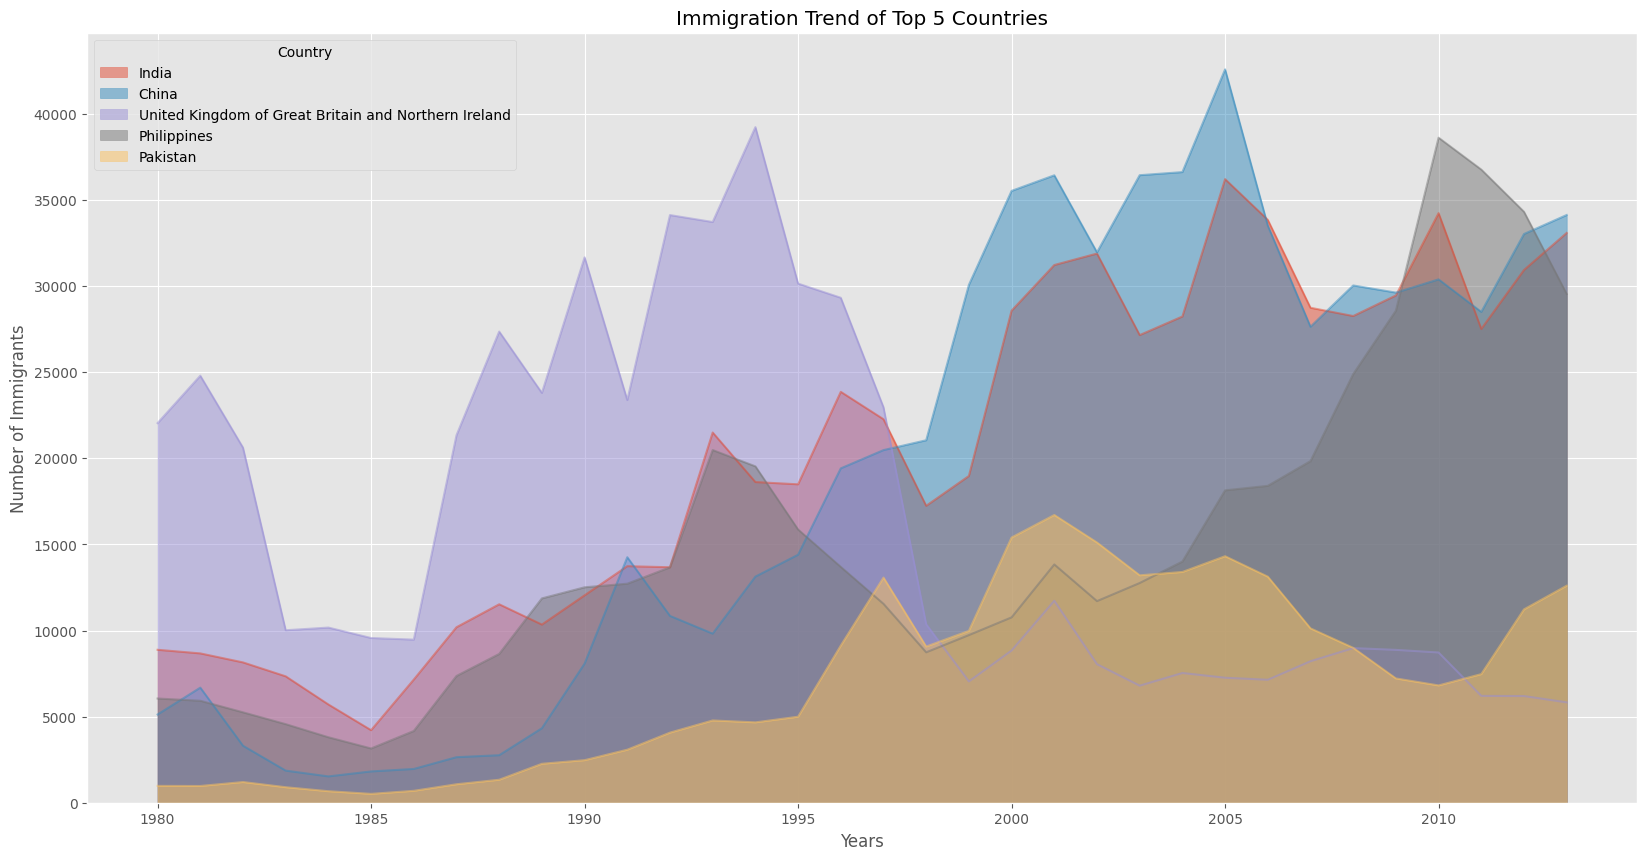

In [13]:
# To produce an unstacked plot, set parameter stacked to value False.

# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='area',
             stacked=False,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

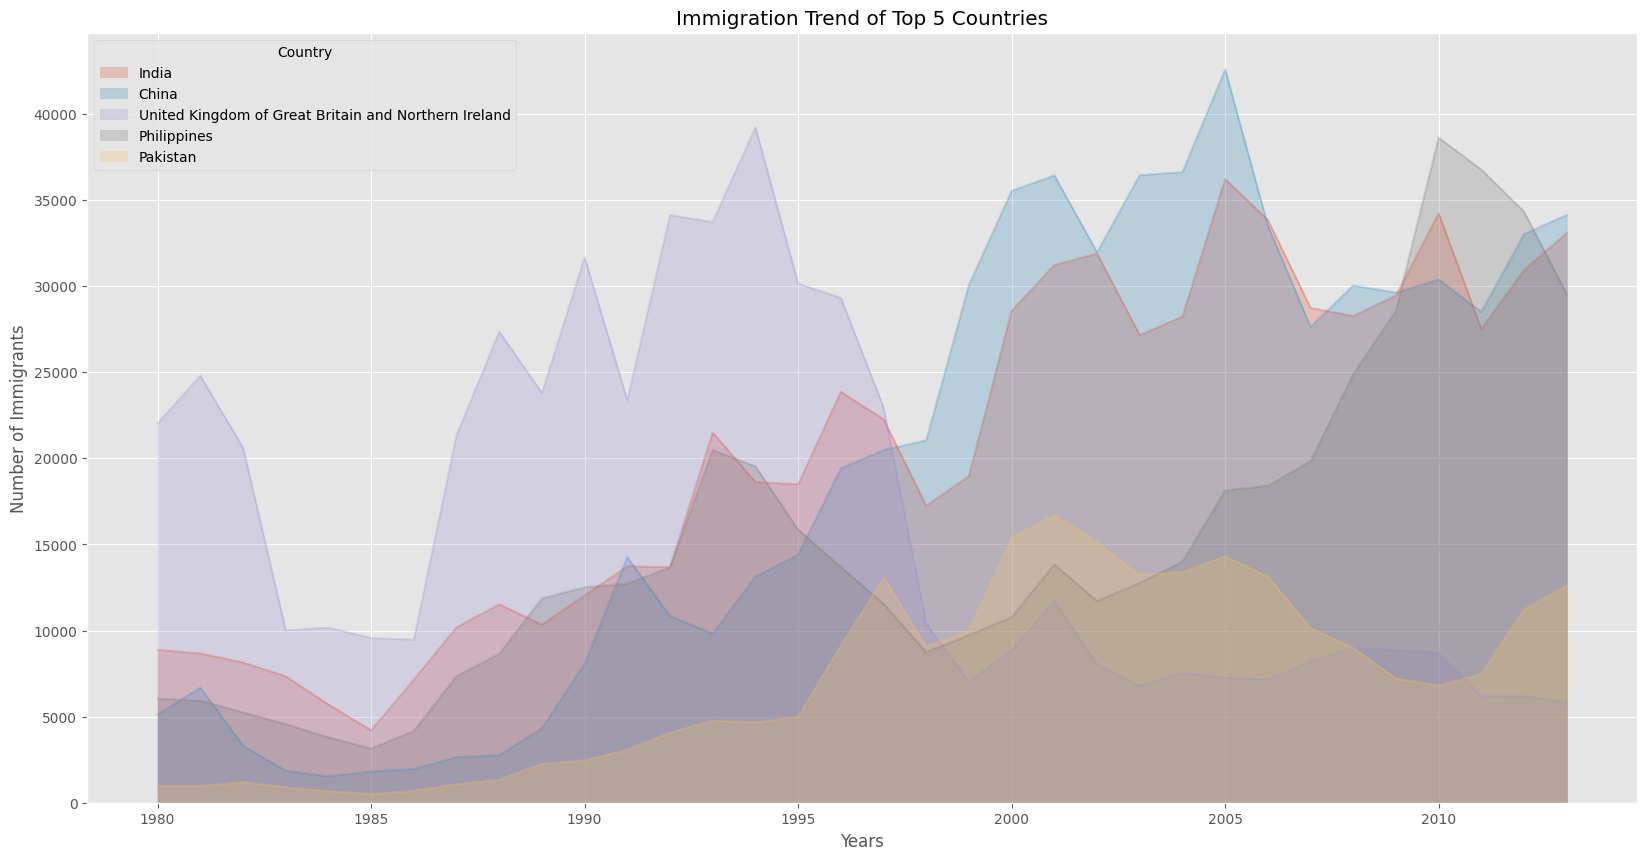

In [14]:
# The unstacked plot has a default transparency (alpha value) at 0.5. We can modify this value by passing in the alpha parameter

df_top5.plot(kind='area',
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

# Plotting Types

Text(0.5, 0, 'Years')

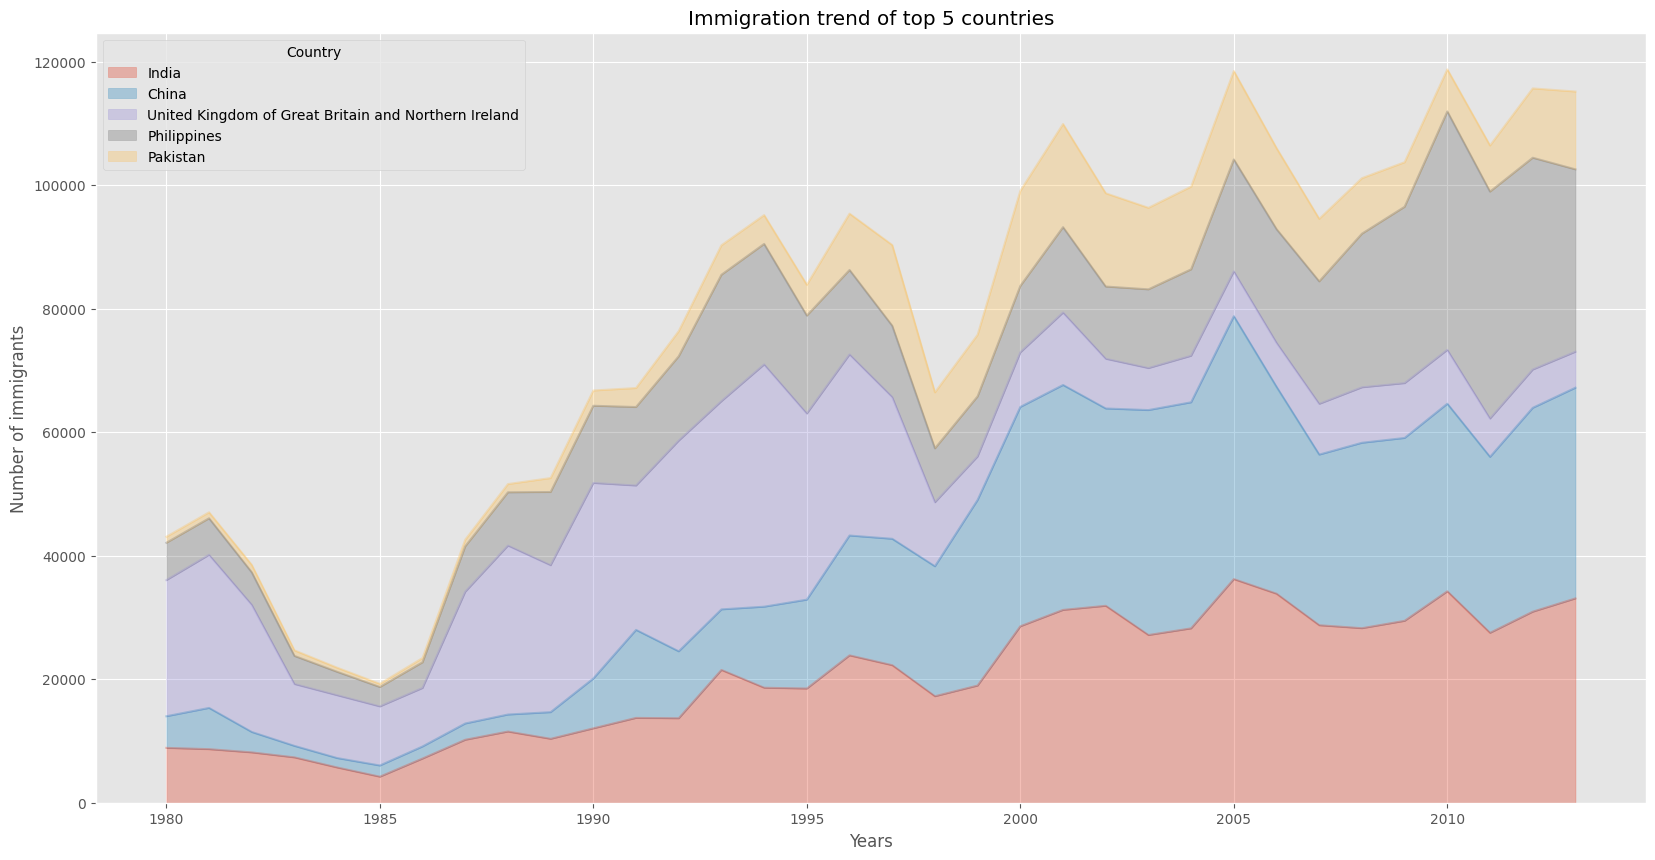

In [15]:
# Option 1: Scripting layer (procedural method) - using matplotlib.pyplot as 'plt'

df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))
plt.title('Immigration trend of top 5 countries')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

Text(0.5, 0, 'Years')

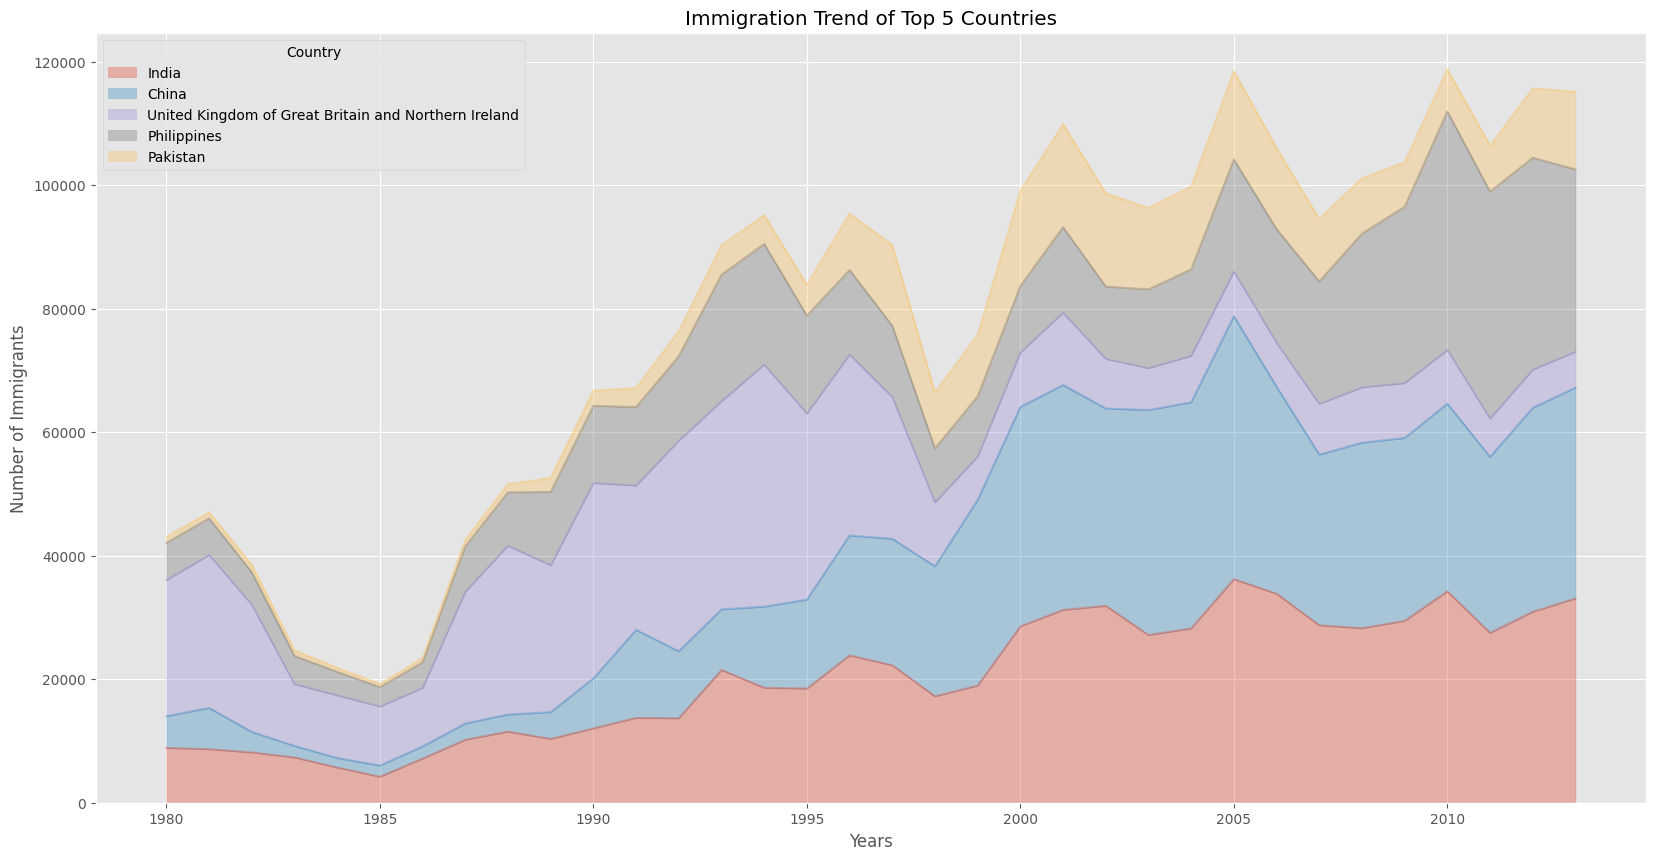

In [16]:
# option 2: preferred option with more flexibility
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

Question: Use the scripting layer to create a stacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.45.

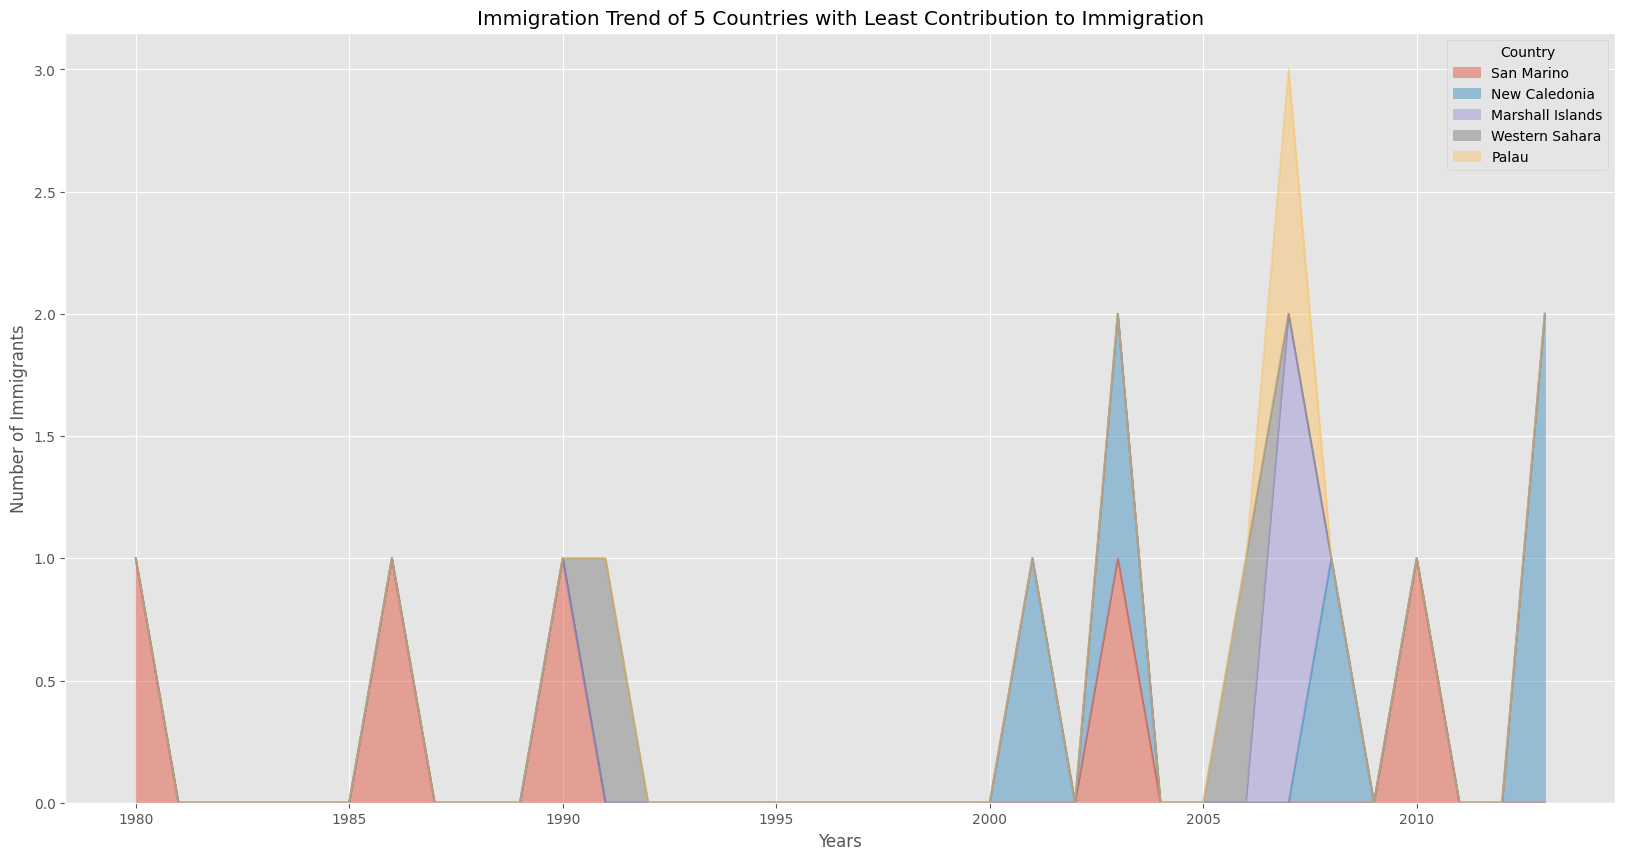

In [17]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()
df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting
df_least5.plot(kind='area', alpha=0.45, figsize=(20, 10))

plt.title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

Question: Use the artist layer to create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada from 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

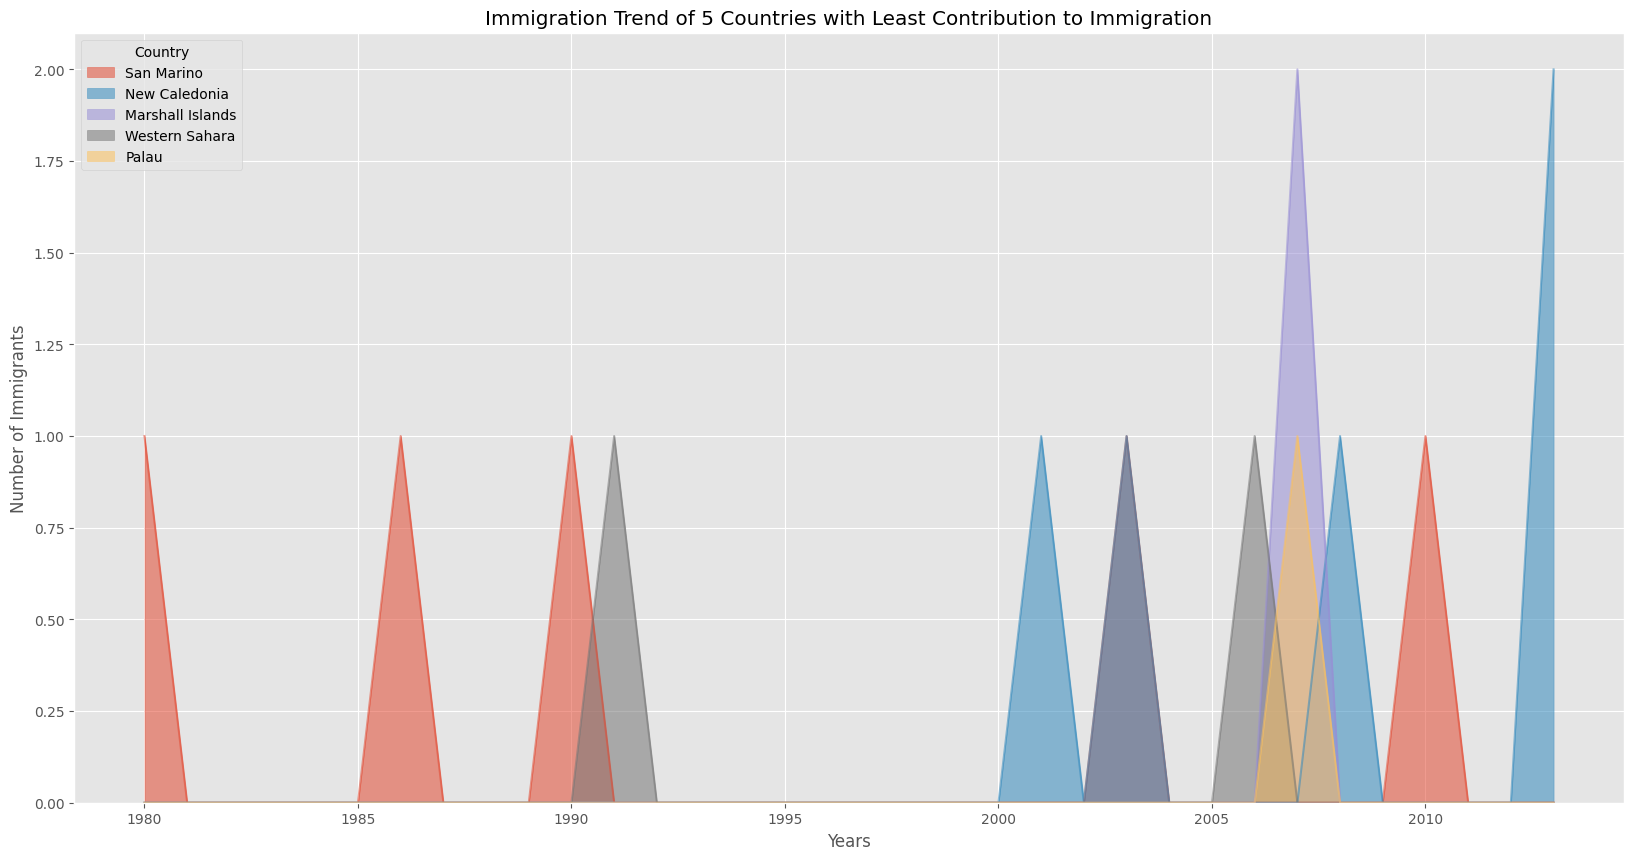

In [18]:
# get the 5 countries with the least contribution
df_least5 = df_can.tail(5)

# transpose the dataframe
df_least5 = df_least5[years].transpose()

df_least5.head()

df_least5.index = df_least5.index.map(int) # let's change the index values of df_least5 to type integer for plotting

ax = df_least5.plot(kind='area', alpha=0.55, stacked=False, figsize=(20, 10))

ax.set_title('Immigration Trend of 5 Countries with Least Contribution to Immigration')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

# Histograms

Question: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [ ]:
# Using Numpy's histrogram method to get the bin ranges and frequency counts

In [19]:
# View the 2013 data
df_can['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [20]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


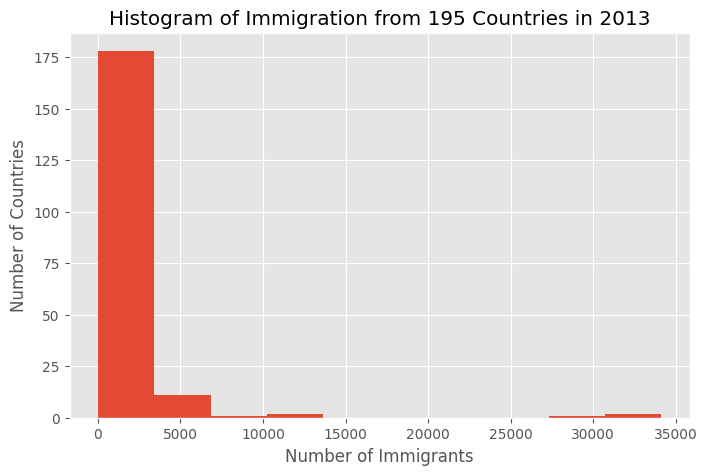

In [21]:
# We can easily graph this distribution by passing kind=hist to plot()

df_can['2013'].plot(kind='hist', figsize=(8, 5))

# add a title to the histogram
plt.title('Histogram of Immigration from 195 Countries in 2013')
# add y-label
plt.ylabel('Number of Countries')
# add x-label
plt.xlabel('Number of Immigrants')

plt.show()

In the above plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

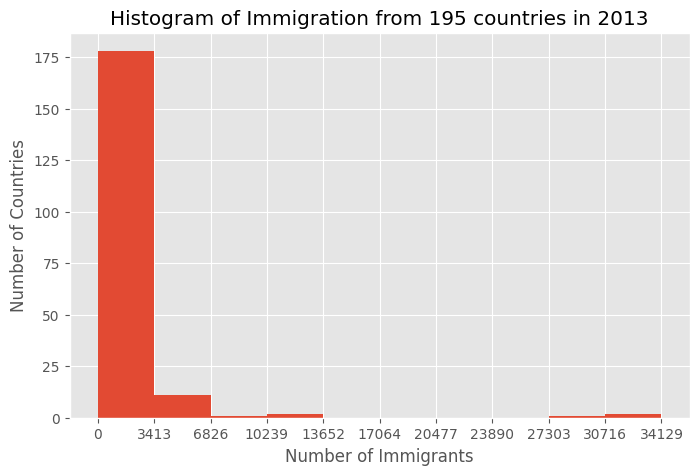

In [22]:
# Notice that the x-axis labels do not match with the bin size. This can be fixed by passing in a xticks keyword that contains the list of the bin

# 'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Question: What is the immigration distribution for Denmark, Norway, Sweden and Nigeria for years 1980 - 2013?

In [24]:
# view the dataset
df_can.loc[['Denmark', 'Norway', 'Sweden', 'Nigeria'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140
Nigeria,81,60,58,58,78,78,114,149,122,195,...,1518,2236,2594,2375,2109,3156,3906,3103,3443,4172


<Axes: ylabel='Frequency'>

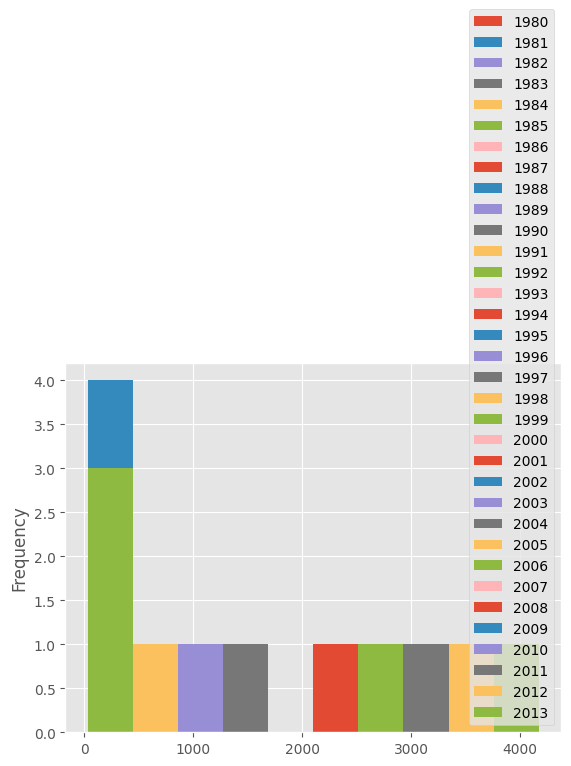

In [26]:
# generate histogram
df_can.loc[['Denmark', 'Norway', 'Sweden', 'Nigeria'], years].plot.hist()

Instead of plotting the population frequency distribution of the population for the 4 countries, pandas instead plotted the population frequency distribution for the years.

This can be easily fixed by first transposing the dataset, and then plotting as shown below.

In [27]:
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden', 'Nigeria'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden,Nigeria
1980,272,116,281,81
1981,293,77,308,60
1982,299,106,222,58
1983,106,51,176,58
1984,93,31,128,78


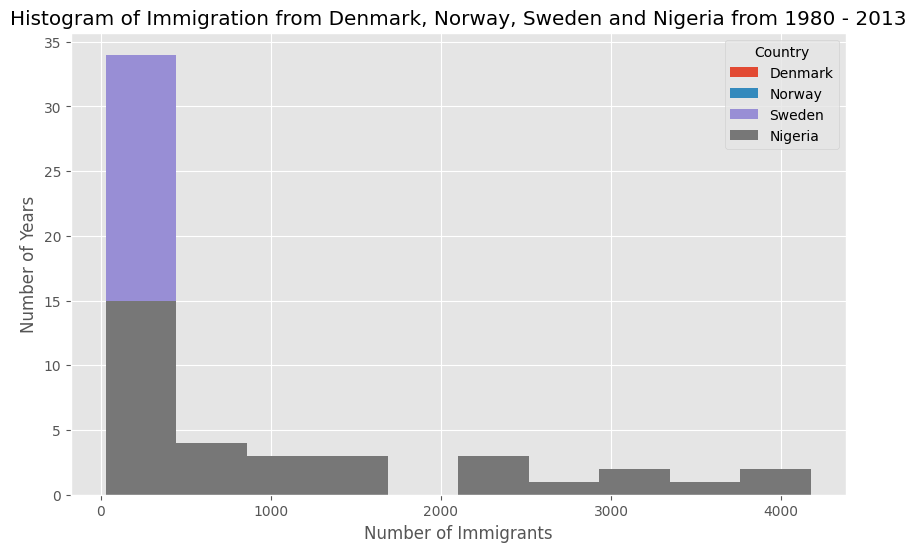

In [29]:
# generate histogram
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, Sweden and Nigeria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

To improve the impact and aesthetics of the previous plot:

increase the bin size to 15 by passing in bins parameter;
set transparency to 60% by passing in alpha parameter;
label the x-axis by passing in x-label parameter;
change the colors of the plots by passing in color parameter.

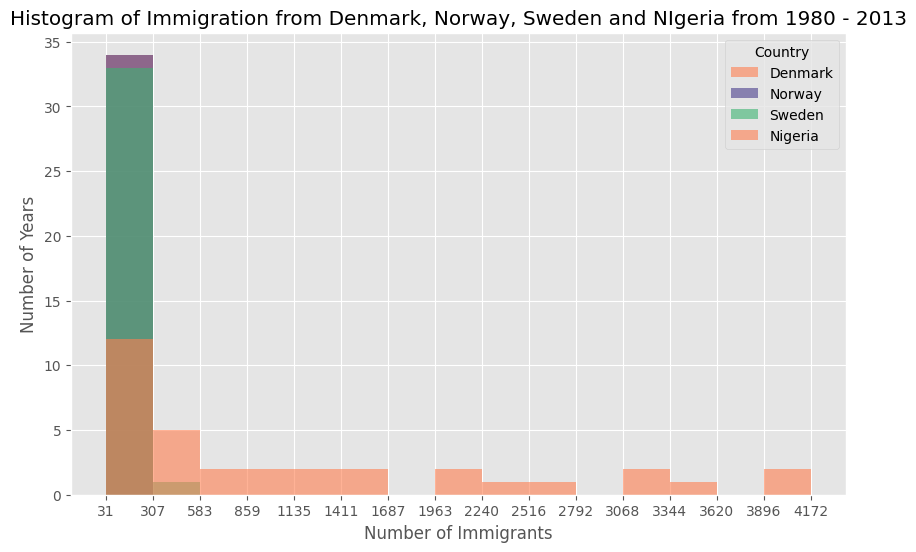

In [31]:
# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)

# un-stacked histogram
df_t.plot(kind ='hist',
          figsize=(10, 6),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']
         )

plt.title('Histogram of Immigration from Denmark, Norway, Sweden and NIgeria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [32]:
# full listing of colors available in Matplotlib, run the following code in your python shell:

import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)


aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


Avoid plots to overlap each other, we can stack them using the stacked parameter. Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot. We can pass a tuple (min,max) using the xlim paramater, as show below.

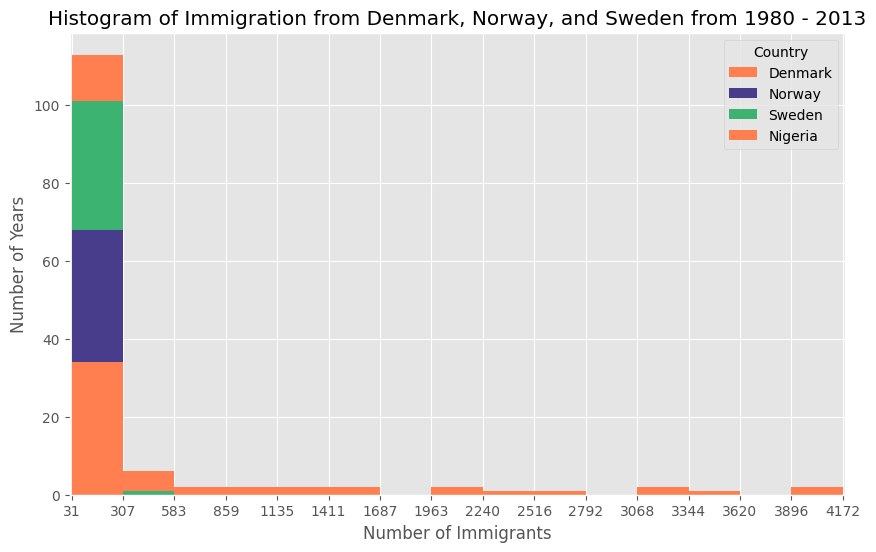

In [33]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6),
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

Question: Use the scripting layer to display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

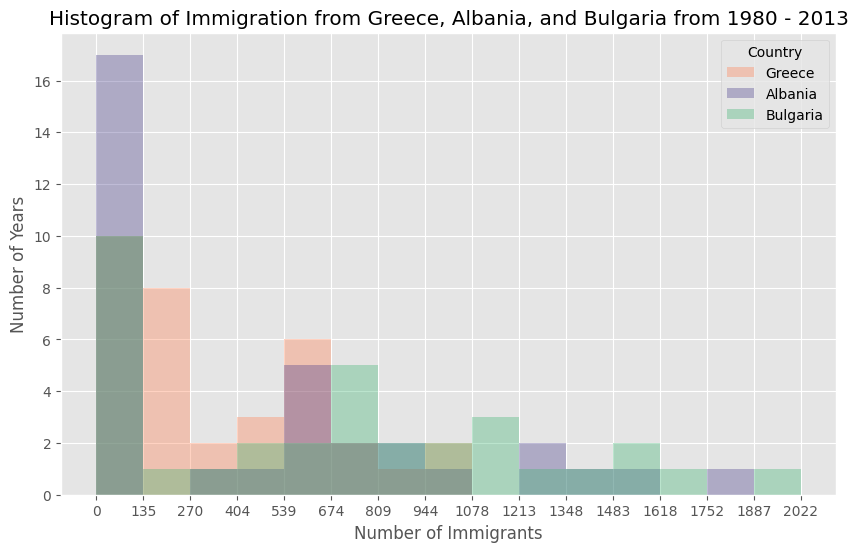

In [34]:
 # create a dataframe of the countries of interest (cof)
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

    # transpose the dataframe
df_cof = df_cof.transpose()

    # let's get the x-tick values
count, bin_edges = np.histogram(df_cof, 15)

    # Un-stacked Histogram
df_cof.plot(kind ='hist',
                figsize=(10, 6),
                bins=15,
                alpha=0.35,
                xticks=bin_edges,
                color=['coral', 'darkslateblue', 'mediumseagreen']
                )

plt.title('Histogram of Immigration from Greece, Albania, and Bulgaria from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')
plt.show()


# Bar Charts (Dataframe)

Question: Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013.

In [35]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

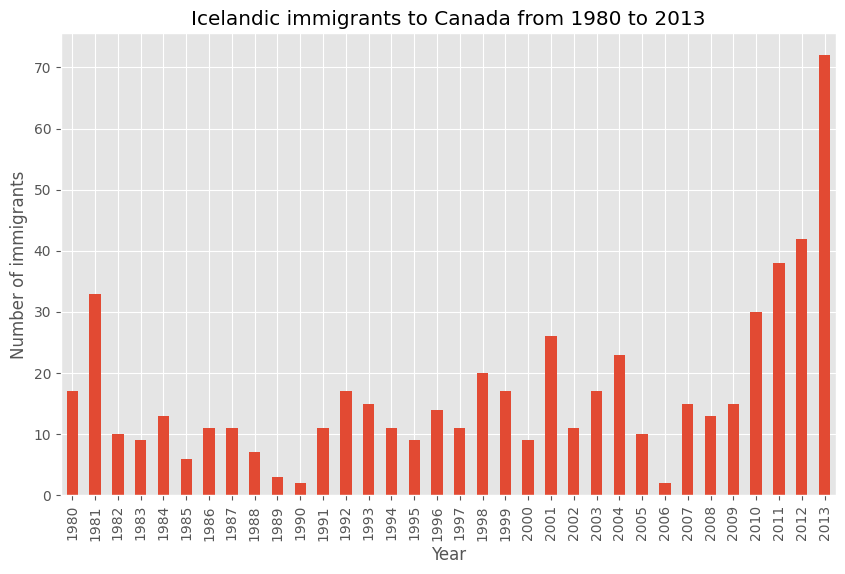

In [36]:
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()

In [ ]:
# Annotate this on the plot using the annotate method of the scripting layer or the pyplot interface

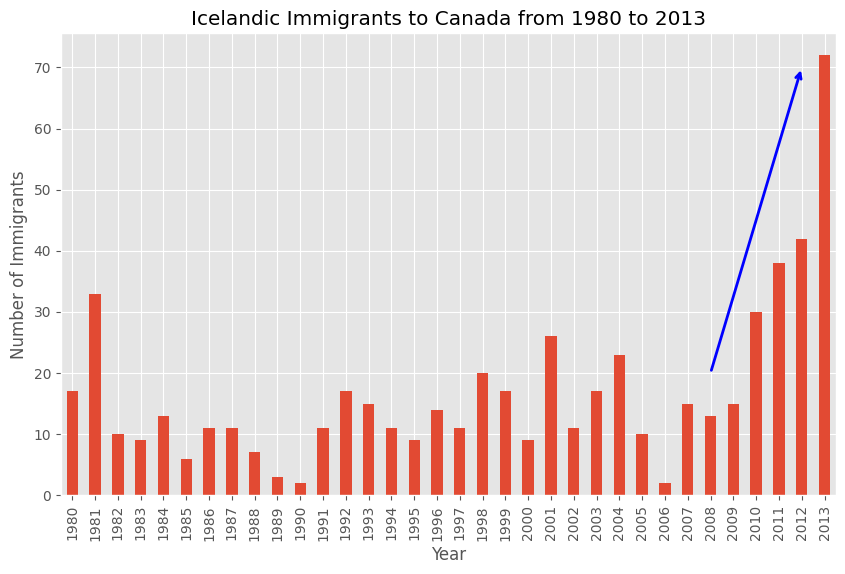

In [37]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)  # rotate the xticks(labelled points on x-axis) by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. Will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

plt.show()

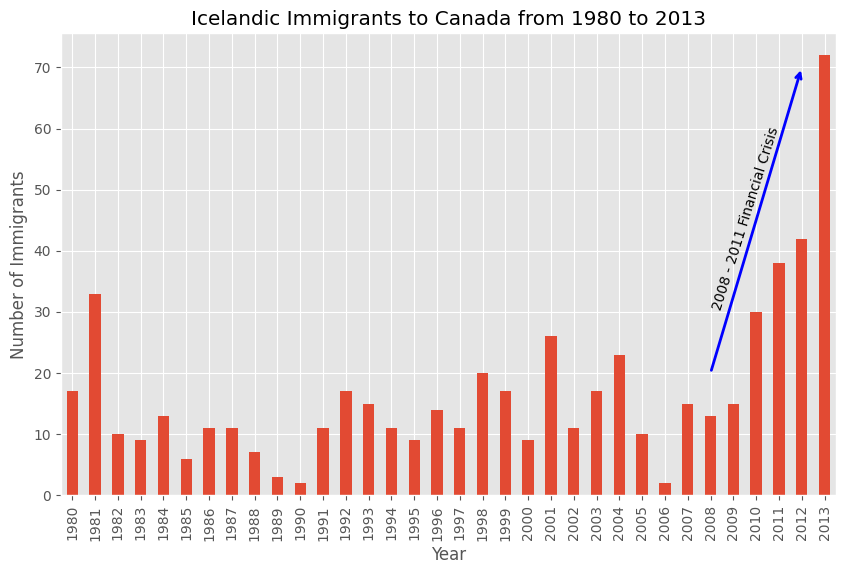

In [38]:
# Annotate a text to go over the arrow. We will pass in the following additional parameters:

df_iceland.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(32, 70),  # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),  # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
             )

# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis',  # text to display
             xy=(28, 30),  # start the text at at point (year 2008 , pop 30)
             rotation=72.5,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

# Horizontal Bar Plot

Sometimes it is more practical to represent the data horizontally, especially if you need more room for labelling the bars

Question: Using the scripting later and the df_can dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

In [39]:
# sort dataframe on 'Total' column (descending)
df_can.sort_values(by='Total', ascending=True, inplace=True)

# get top 15 countries
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data:

Use kind='barh' to generate a bar chart with horizontal bars.
Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface.

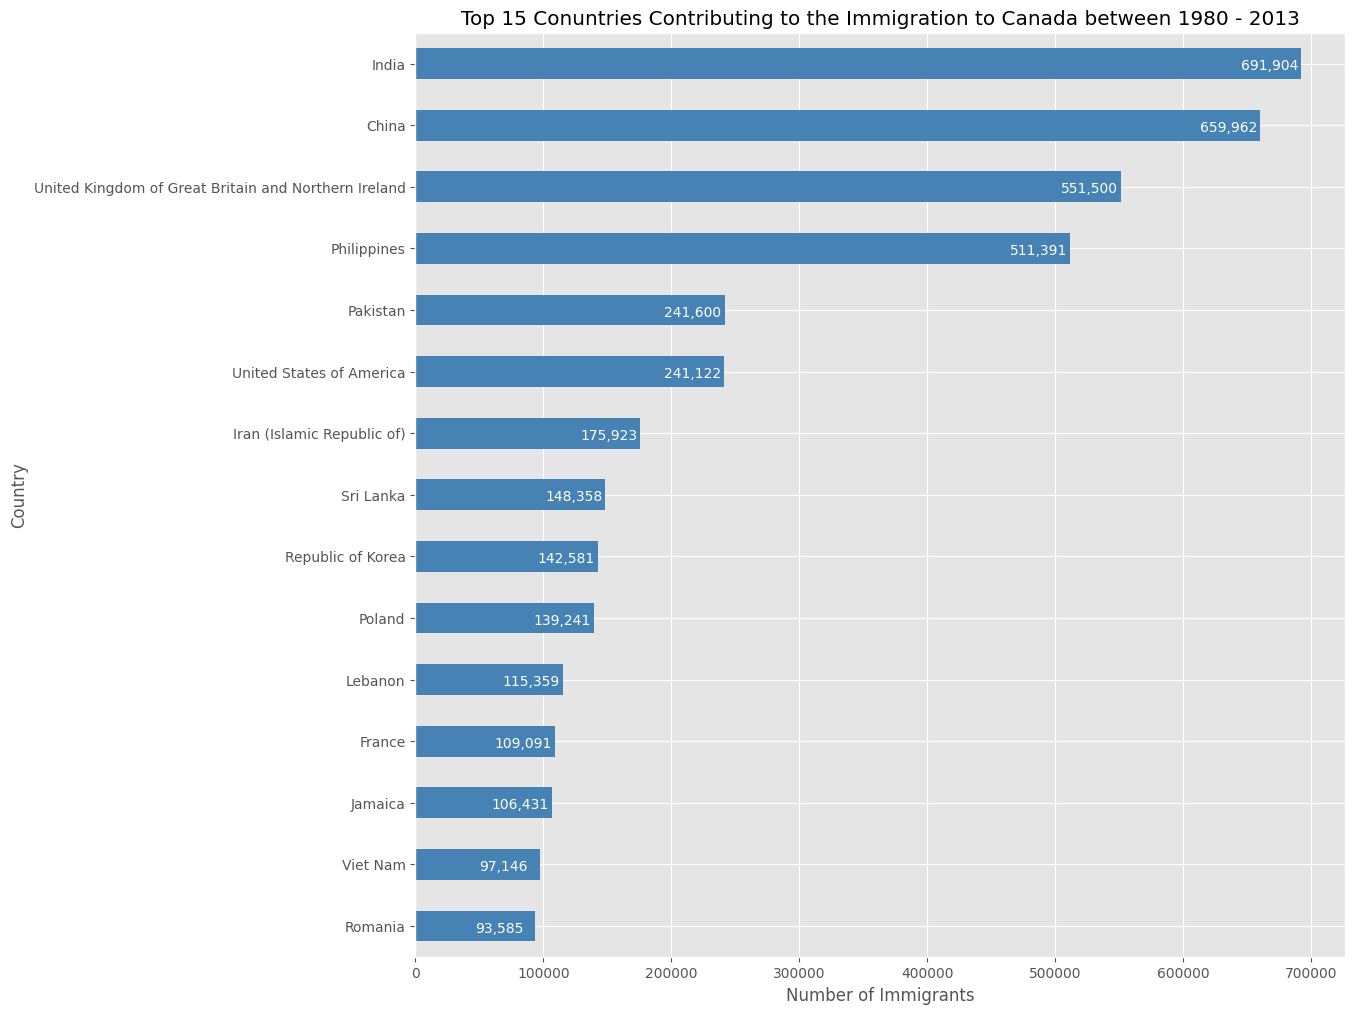

In [40]:
# generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

# annotate value labels to each country
for index, value in enumerate(df_top15):
        label = format(int(value), ',') # format int with commas

# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
        plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')

plt.show()